# 1D Transient Heat Transfer Review
In this module we derived the finite difference equations for the 1D heat equation from the shell balance.
To refresh your memory, the 1D transient heat equation is given by:
$$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$$
Where:
- $T$ is the temperature (K or °C)
- $t$ is time (s)
- $x$ is the spatial coordinate (m)
- $\alpha$ is the thermal diffusivity (m²/s), defined as $\alpha = \frac{k}{\rho c_p}$, where $k$ is thermal conductivity (W/m·K), $\rho$ is density (kg/m³), and $c_p$ is specific heat capacity (J/kg·K).

```{hint} Using these notebooks
You can run and modify the code in these notebooks using [Google Colab](https://colab.research.google.com/). Click the badge below to open the notebook in Colab, where you can execute the code cells and experiment with different parameters. Or you can download the notebooks and run them locally using Jupyter Notebook or JupyterLab by clicking on the download icon on the top right corner of the title block.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mtrl-ubc/mtrl361/blob/main/transient-heat-transfer/theory.ipynb)
```

## Finite Difference Discretization
To solve the heat equation numerically, we discretize both time and space.
- Spatial discretization: Divide the rod into $N_x$ segments of length $\Delta x$.
- Temporal discretization: Divide time into $N_t$ steps of size $\Delta t$.

Let $T_i^n$ represent the temperature at spatial node $i$ and time step $n$.

Using central differences for the spatial derivative and forward differences for the time derivative, we can approximate the derivatives as follows:
$$\frac{\partial T}{\partial t} \approx \frac{T_i^{n+1} - T_i^n}{\Delta t}$$
$$\frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1}^n - 2T_i^n + T_{i-1}^n}{(\Delta x)^2}$$
Substituting these approximations into the heat equation gives us the finite difference equation:
$$T_i^{n+1} = T_i^n + \frac{\alpha \Delta t}{(\Delta x)^2} (T_{i+1}^n - 2T_i^n + T_{i-1}^n)$$

## Explicit Method
The explicit method computes the temperature at the next time step directly from the current time step. The update formula is:
$$T_i^{n+1} = T_i^n + Fo (T_{i+1}^n - 2T_i^n + T_{i-1}^n)$$
Where $Fo = \frac{\alpha \Delta t}{(\Delta x)^2}$ is the Fourier number.
The explicit method is straightforward to implement but requires careful consideration of stability conditions.
The time step $\Delta t$ must be chosen such that the Fourier number $Fo$ satisfies the stability criterion.
The stability condition for the explicit method is:
$$Fo \leq \frac{1}{2}$$


## Implicit Method
The implicit method requires solving a system of equations at each time step. The update formula is:
$$-Fo T_{i-1}^{n+1} + (1 + 2Fo) T_i^{n+1} - Fo T_{i+1}^{n+1} = T_i^n$$
This leads to a tridiagonal system of equations that can be solved using linear algebra techniques.
The implicit method is unconditionally stable, allowing for larger time steps compared to the explicit method, but it is computationally more intensive due to the need to solve the system of equations at each time step.

## Boundary and Initial Conditions
To solve the heat equation using finite difference methods, we need to specify boundary and initial conditions.
- Initial Condition: The temperature distribution along the rod at time $t=0$.
- Boundary Conditions: There are three common types:
  - Dirichlet Boundary Condition: Specifies the temperature at the boundaries (e.g., $T(0,t) = T_0$, $T(L,t) = T_L$).
  - Neumann Boundary Condition: Specifies the heat flux at the boundaries (e.g., $\frac{\partial T}{\partial x}\big|_{x=0} = q_0$, $\frac{\partial T}{\partial x}\big|_{x=L} = q_L$).
  - Robin Boundary Condition: Here the heat flux is proportional to the temperature difference between the surface and the surrounding fluid (e.g., $-k \frac{\partial T}{\partial x}\big|_{x=0} = h(T(0,t) - T_\infty)$).

## Analytical Solution for Comparison
```{figure} bc_analytical.png
:label: bc_analytical
:alt: Representation of different boundary conditions
:align: center

Representation of different boundary conditions for 1D transient heat conduction for a semi-infinite solid.
```
The analytical solution for the 1D transient heat conduction in a rod with specified boundary and initial conditions are based on the analytical solutions for the semi-infinite domain problems. According to Incropera and Dewitt, the solutions for the different boundary conditions are as follows:
- For Dirichlet Boundary Conditions:
$$\frac{T(x,t) - T_s}{T_0 - T_s} = \text{erf}\left(\frac{x}{2\sqrt{\alpha t}}\right)$$
- For Neumann Boundary Conditions:
$$T(x, t) - T_0 = \frac{2q_0(\frac{\alpha t}{\pi})^\frac{1}{2}}{k} \text{exp}\left(-\frac{x^2}{4\alpha t}\right) - \frac{q_0 x}{k} \text{erfc}\left(\frac{x}{2\sqrt{\alpha t}}\right)$$
- For Robin Boundary Conditions:
$$\frac{T(x,t) - T_0}{T_\infty - T_0} = \text{erfc}\left(\frac{x}{2\sqrt{\alpha t}}\right) - \left[\exp\left(\frac{hx}{k} + \frac{h^2 \alpha t}{k^2}\right)\right] \left[\text{erfc}\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t}}{k}\right)\right]$$
Where:
- $T_\infty$ is the ambient temperature
- $T_0$ is the initial temperature at the boundary
- $T_s$ is the surface temperature at the boundary
- $q_0$ is the specified heat flux at the boundary
- $h$ is the convective heat transfer coefficient
- $\text{erf}$ and $\text{erfc}$ are the error function and complementary error function, respectively.
These analytical solutions can be used to validate the numerical results obtained from the finite difference methods.


```{exercise}
:label: analytical_exercise

Using the analytical solutions provided above, calculate the temperature distribution in a rod of length 0.1 m made of aluminum with the following material properties and initial and boundary conditions:
| Property | Value |
|----------|-------|
| Thermal conductivity, $k$ | 205 $W/m·°C$ |
| Density, $\rho$ | 2700 $kg/m³$ |
| Specific heat capacity, $c_p$ | 900 $J/kg·°C$ |

- Initial temperature: $T_0 = 20 °C$
- Boundary condition at $x=0$: Dirichlet, $T(0,t) = 100 °C$
- Boundary condition at $x=L$: Neumann, $q(L,t) = 200 \, W/m^2$
- Boundary condition at $x=L$: Robin, $h = 100 \, W/m²K, T_\infty = 100 \, °C$
- Time: $t = 20, 40, 60 \, s$

Plot the temperature distribution along the rod for each boundary condition.
```


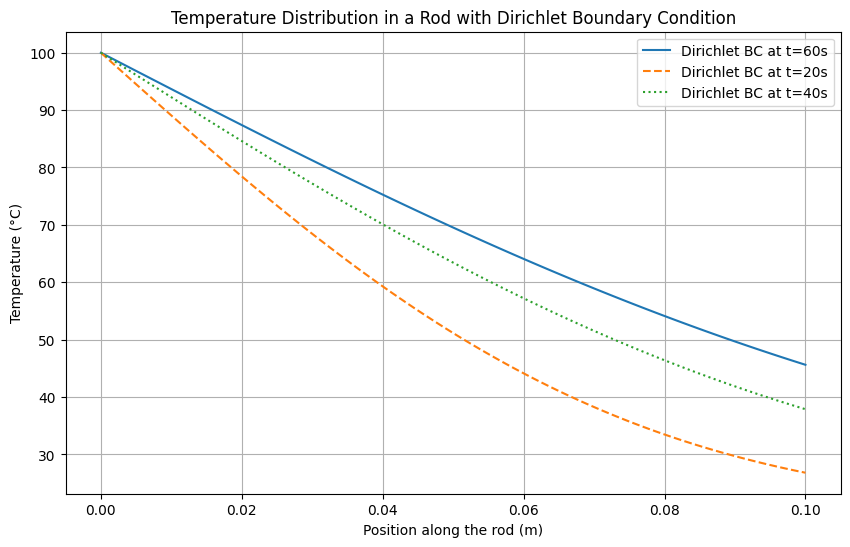

In [6]:
# Write python functions to implement the analytical solutions for the different boundary conditions and use them to solve the exercise above.
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

def analytical_dirichlet(x, t, T0, Ts, alpha):
    return Ts + (T0 - Ts) * erf(x / (2 * np.sqrt(alpha * t)))

def analytical_neumann(x, t, T0, q0, k, alpha):
    term1 = (2 * q0 * np.sqrt(alpha * t / np.pi))
    term2 = np.exp(-x**2 / (4 * alpha * t))
    term3 = (q0 * x) / k * erfc(x / (2 * np.sqrt(alpha * t)))
    return T0 + term1 * term2 - term3


# Material properties for aluminum
k = 205.0  # W/m·K
rho = 2700.0  # kg/m³
cp = 900.0  # J/kg·K
alpha = k / (rho * cp)  # m²/s
# Given conditions
L = 0.1  # m
T0 = 20.0  # °C
Ts = 100.0  # °C
q0 = 200.0  # W/m²
T_inf = 100.0  # °C
t = 60.0  # seconds

# Spatial discretization
x = np.linspace(0, L, 100)

# Calculate temperature distributions
T_dirichlet = analytical_dirichlet(x, t, T0, Ts, alpha)
T_dirichlet_20 = analytical_dirichlet(x, 20, T0, Ts, alpha)
T_dirichlet_40 = analytical_dirichlet(x, 40, T0, Ts, alpha)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, T_dirichlet, label='Dirichlet BC at t=60s')
plt.plot(x, T_dirichlet_20, label='Dirichlet BC at t=20s', linestyle='--')
plt.plot(x, T_dirichlet_40, label='Dirichlet BC at t=40s', linestyle=':')
plt.xlabel('Position along the rod (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution in a Rod with Dirichlet Boundary Condition')
plt.legend()
plt.grid(True)
plt.show()

# Similarly, you can implement and plot for Neumann and Robin boundary conditions. This is left as an exercise for the reader.

The general trend of the solutions for the different BCs is shown in the figure below.
```{figure} bc_analytical_solutions.png
:label: bc_solutions
:alt: Temperature profiles for different boundary conditions
:align: center
Temperature profiles for Dirichlet, Neumann, and Robin boundary conditions at various time intervals.
```